In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [4]:
df.duplicated().sum()

np.int64(3854)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [7]:
from sklearn.model_selection import train_test_split


<BarContainer object of 3 artists>

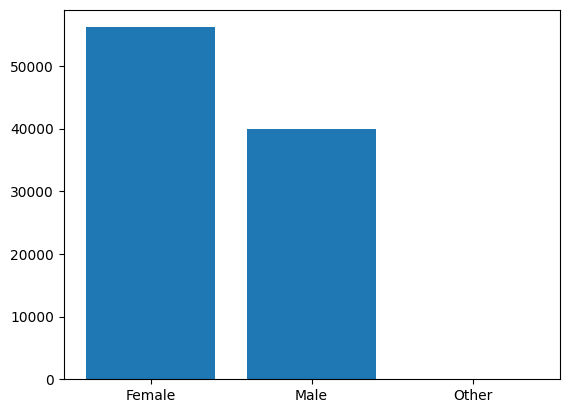

In [8]:
gender_count = df['gender'].value_counts()
plt.bar(gender_count.index, gender_count.values)

<Axes: ylabel='Frequency'>

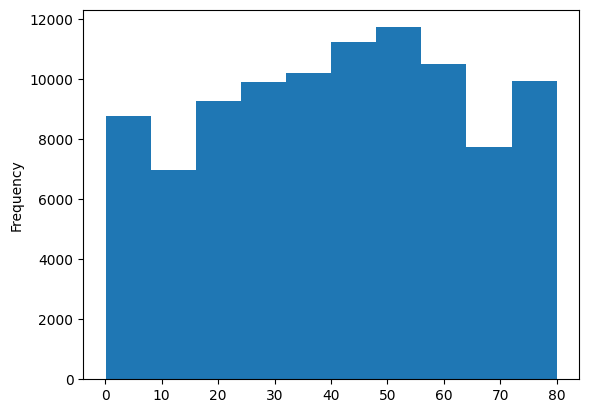

In [9]:
df.age.plot(kind='hist')


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


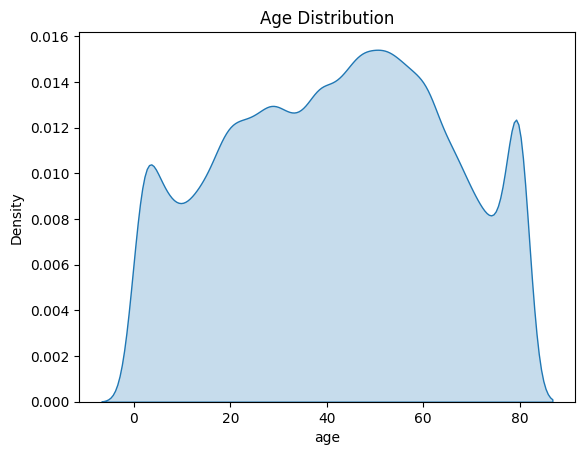

In [11]:
sns.kdeplot(df['age'], fill=True)
plt.title('Age Distribution')
plt.show()

<Axes: >

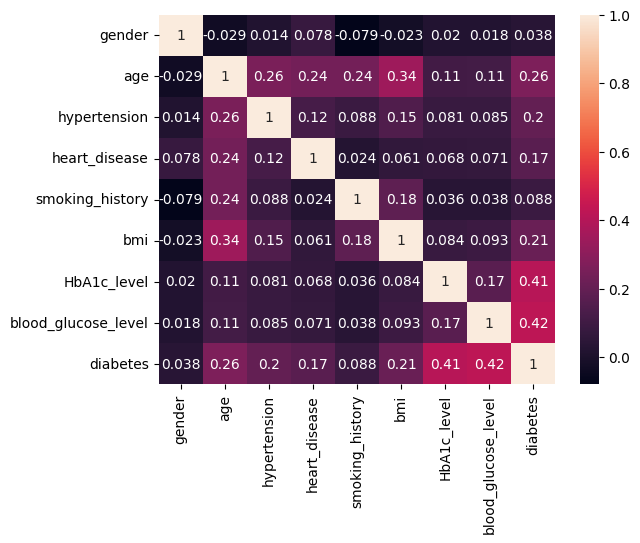

In [12]:
sns.heatmap(df.corr(), annot=True)


after looking at the heatmap, we can see that not all column have correlation to diabetes, so we gonna use the column that have strong correlation with diabetes

In [13]:
X = df[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level', 'hypertension']]
y = df['diabetes']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# model = LogisticRegression()
model = RandomForestClassifier(n_estimators=100, random_state=42)
# model = DecisionTreeClassifier()
# model = KNeighborsClassifier()
# model = SVC()
# model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("\n📊 LogisticRegression Model Performance:")
print(model.score(X_test, y_test))



📊 LogisticRegression Model Performance:
0.9670306812272491


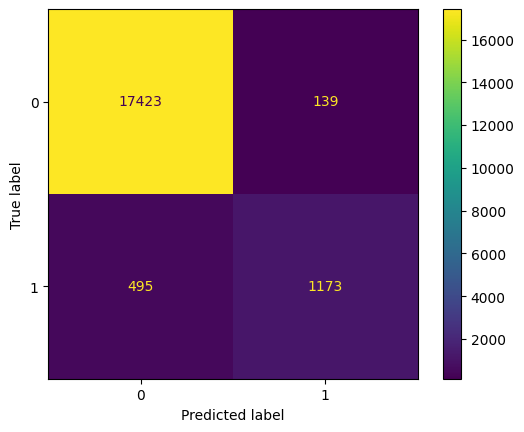

In [16]:
from sklearn import metrics
cm = confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [17]:

print("\n📊 LogisticRegression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# LogisticRegression : 0.9596983879355174
# RandomForestClassifier: 0.9670306812272491
# DecisionTreeClassifier : 0.9520020800832033
# KNeighborsClassifier : 0.955226209048362
# SVC: 0.9492459698387935
# GaussianNB: 0.9165886635465419



📊 LogisticRegression Model Performance:
Accuracy: 0.9670306812272491
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17562
           1       0.89      0.70      0.79      1668

    accuracy                           0.97     19230
   macro avg       0.93      0.85      0.88     19230
weighted avg       0.97      0.97      0.97     19230

Confusion Matrix:
 [[17423   139]
 [  495  1173]]


In [18]:
# Ensemble Model (Voting Classifier)
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier(max_depth=6, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=300, random_state=42))
    ],
    voting='soft'
)


In [19]:
# Cross-validation for ensemble
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ensemble, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())


Cross-Validation Scores: [0.97056682 0.97113734 0.9684851  0.97160539 0.9706173 ]
Mean Cross-Validation Accuracy: 0.9704823904849688


In [20]:
# Train final ensemble
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [21]:
# Evaluation
print("\nFinal Ensemble Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Final Ensemble Model Performance:
Accuracy: 0.9717628705148206
Confusion Matrix:
 [[17548    14]
 [  529  1139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17562
           1       0.99      0.68      0.81      1668

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



In [22]:
# Save the Model

import pickle
with open('Diabetes_model.pkl', 'wb') as f:
    pickle.dump(ensemble, f)

print("\n Model saved successfully as 'Diabetes_model.pkl'!")




 Model saved successfully as 'Diabetes_model.pkl'!


In [24]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
77645,0,0
68911,1,1
4123,0,0
50172,1,1
71861,0,0
...,...,...
70898,0,0
75551,0,0
8331,0,0
60874,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


In [26]:
df.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0
